### Problem statement:

In this project we are working on the `Lending club` dataset. Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). 

From the given set of data we want to predict `loan_status` of the borrower. We have to predict the loan staus based on the features like `Loan amount`,`payment plan`,`grade`,`verification status`,`recoveries` etc. The loan status having the various categories like `Fully paid`,`charged off`,`late`,`Issued`,`In a grace period` etc. 

### About the dataset


A zipped file containing following items is given:

- train.csv

The data file `train.csv` contains the `621165` loan status entries with the `80` features including the target feature.

- test.csv

The datafile `test.csv` contains the `266214` loan status entries with the `79` features excluding the target feature.

- sample_submission.csv 

Explained under the `submission` sub-heading

- LCDataDictionary.csv

The file contains data dictionary(Dictionary explaining what each feature of the dataset means) of the lending club dataset

- challenge_entity_student_template.ipynb

A template notebook explaining the task breakdown to solve the given problem statement
(***Learners are recommended to use it***)


## Submission

The user has to submit a csv file with the predicted probabilities. Sample submission file(`sample_submission.csv`) is given to you as reference to the format expected when you submit


## Evaluation metrics

For this particular dataset we are using Accuracy as a evaluation metric. 

Submissions will be evaluated based on [Accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
### Outcomes
After completing this project, you will have the better understanding of how to build a basic neural network  model. In this project, you will apply the following concepts.

 
- Neural Network Model creation
- Neural Network Model training




#### Acknowledgements 

More details about the dataset can be found at https://www.kaggle.com/wendykan/lending-club-loan-data

### Load the data


#### Instructions:

- Load the train data
- Split the dependent and independent features 
- Scale the features
- Split the dataset into `train` and `validation` set.






In [2]:
import tensorflow
tensorflow.random.set_seed(2)
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

In [4]:
pd.read_excel('LCDataDictionary.xlsx')

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [5]:
data = pd.read_csv('train.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621165 entries, 0 to 621164
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   621165 non-null  float64
 1   funded_amnt                 621165 non-null  float64
 2   funded_amnt_inv             621165 non-null  float64
 3   int_rate                    621165 non-null  float64
 4   installment                 621165 non-null  float64
 5   annual_inc                  621165 non-null  float64
 6   dti                         621165 non-null  float64
 7   delinq_2yrs                 621165 non-null  float64
 8   inq_last_6mths              621165 non-null  float64
 9   open_acc                    621165 non-null  float64
 10  pub_rec                     621165 non-null  float64
 11  revol_bal                   621165 non-null  float64
 12  revol_util                  621165 non-null  float64
 13  total_acc     

In [11]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2,loan_status
0,20000.0,20000.0,20000.0,8.18,407.26,200000.0,8.76,0.0,1.0,14.0,...,0,0,1,0,0,1,0,1,0,1
1,7500.0,7500.0,7500.0,11.99,249.08,157000.0,19.04,0.0,1.0,8.0,...,1,0,1,0,1,0,0,1,0,1
2,11200.0,11200.0,11100.0,14.65,264.40,80000.0,16.74,1.0,2.0,12.0,...,0,0,1,0,0,1,0,1,0,1
3,6000.0,6000.0,6000.0,11.99,199.26,55000.0,27.93,1.0,1.0,13.0,...,0,0,1,0,1,0,1,0,0,1
4,10000.0,10000.0,10000.0,8.67,316.47,40000.0,16.53,0.0,0.0,9.0,...,0,0,1,0,1,0,1,0,0,5


In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [13]:
for j in X.columns:
    X[j] = X[j].astype('float64')

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621165 entries, 0 to 621164
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   621165 non-null  float64
 1   funded_amnt                 621165 non-null  float64
 2   funded_amnt_inv             621165 non-null  float64
 3   int_rate                    621165 non-null  float64
 4   installment                 621165 non-null  float64
 5   annual_inc                  621165 non-null  float64
 6   dti                         621165 non-null  float64
 7   delinq_2yrs                 621165 non-null  float64
 8   inq_last_6mths              621165 non-null  float64
 9   open_acc                    621165 non-null  float64
 10  pub_rec                     621165 non-null  float64
 11  revol_bal                   621165 non-null  float64
 12  revol_util                  621165 non-null  float64
 13  total_acc     

In [15]:
to_be_scaled = []
for i in X.columns:
    if X[i].max()>1.0:
        to_be_scaled.append(i)

In [16]:
scaler = MinMaxScaler()
X[to_be_scaled] = scaler.fit_transform(X[to_be_scaled])

In [17]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2
0,0.565217,0.565217,0.571429,0.120828,0.273879,0.022222,0.000876,0.000000,0.030303,0.155556,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.202899,0.202899,0.214286,0.281791,0.163248,0.017444,0.001904,0.000000,0.030303,0.088889,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.310145,0.310145,0.317143,0.394170,0.173963,0.008889,0.001674,0.025641,0.060606,0.133333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.159420,0.159420,0.171429,0.281791,0.128403,0.006111,0.002793,0.025641,0.030303,0.144444,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.275362,0.275362,0.285714,0.141529,0.210381,0.004444,0.001653,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .20, random_state= 9, stratify=y)

In [19]:
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)

### Model building

- Create a sequential model
- Fit the model on the train data 
- Evaluate the model on the validation set.

In [20]:
# import libraries 
# from keras import models
# from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
# code starts here

model = Sequential()
model.add(Dense(64,input_shape = (X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# code ends here


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5120      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3

### Predictor check !

#### Instructions:

- Load the test data
- Predict the model on the `test_data`
- Create a submission file 


Train on 397545 samples, validate on 99387 samples
Epoch 1/20
397545/397545 [==============================] - 3s 9us/sample - loss: 0.8481 - accuracy: 0.7229 - val_loss: 0.6329 - val_accuracy: 0.8237
Epoch 2/20
397545/397545 [==============================] - 3s 7us/sample - loss: 0.5183 - accuracy: 0.8713 - val_loss: 0.4566 - val_accuracy: 0.8846
Epoch 3/20
397545/397545 [==============================] - 4s 9us/sample - loss: 0.4099 - accuracy: 0.8999 - val_loss: 0.3848 - val_accuracy: 0.9064
Epoch 4/20
397545/397545 [==============================] - 3s 7us/sample - loss: 0.3584 - accuracy: 0.9149 - val_loss: 0.3742 - val_accuracy: 0.9013
Epoch 5/20
397545/397545 [==============================] - 2s 6us/sample - loss: 0.3271 - accuracy: 0.9235 - val_loss: 0.3532 - val_accuracy: 0.9036
Epoch 6/20
397545/397545 [==============================] - 3s 7us/sample - loss: 0.3063 - accuracy: 0.9310 - val_loss: 0.3051 - val_accuracy: 0.9310
Epoch 7/20
397545/397545 [=======================

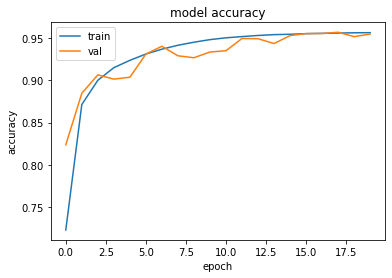

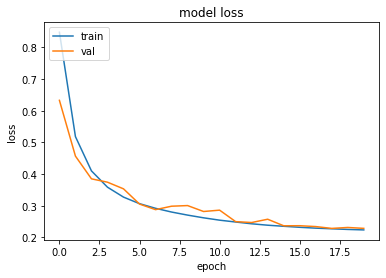

124233/124233 [==============================] - 3s 23us/sample - loss: 0.2258 - accuracy: 0.9554
0.22582423090070547 0.9553742


In [21]:
# import packages
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Code starts here
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

early_stop = EarlyStopping(patience=5)

history = model.fit(X_train,y_train,batch_size = 500,validation_split = 0.2,epochs=20,callbacks=[early_stop])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss,test_acc = model.evaluate(X_val,y_val)
print(test_loss,test_acc)
# Code ends here

In [25]:
data_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data_test = pd.read_csv('test.csv')

In [27]:
for k in data_test.columns:
    data_test[k] = data_test[k].astype('float64')

In [28]:
data_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2
0,12400.0,12400.0,12400.0,13.05,418.11,80460.0,10.17,0.0,0.0,12.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,8000.0,8000.0,8000.0,10.99,261.88,265000.0,2.28,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,15000.0,15000.0,15000.0,6.24,457.97,110000.0,8.26,0.0,0.0,13.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,8500.0,8500.0,8500.0,17.77,306.32,54000.0,5.31,1.0,3.0,14.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,17600.0,17600.0,17600.0,12.29,587.02,60000.0,18.40,0.0,0.0,13.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
data_test[to_be_scaled] = scaler.transform(data_test[to_be_scaled])

In [30]:
data_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2
0,0.344928,0.344928,0.354286,0.326574,0.281468,0.008940,0.001017,0.000000,0.000000,0.133333,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.217391,0.217391,0.228571,0.239544,0.172200,0.029444,0.000228,0.000000,0.000000,0.022222,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.420290,0.420290,0.428571,0.038868,0.309346,0.012222,0.000826,0.000000,0.000000,0.144444,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.231884,0.231884,0.242857,0.525982,0.203282,0.006000,0.000531,0.025641,0.090909,0.155556,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.495652,0.495652,0.502857,0.294466,0.399604,0.006667,0.001840,0.000000,0.000000,0.144444,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [85]:
y_pred_softmax =  model.predict(data_test)

In [86]:
sample_file = pd.read_csv('sample_submission.csv')

In [93]:
sample_file['loan_status'].unique()

array([5, 1, 0, 7, 4, 3, 9], dtype=int64)

In [94]:
y_pred = pd.Series(np.argmax(y_pred_softmax,axis=1))

In [95]:
list(y_pred_softmax[3]).index(max(list(y_pred_softmax[3])))

5

In [96]:
len(y_pred),len(sample_file)

(266214, 266214)

In [97]:
sample_file['loan_status'] = y_pred

In [98]:
sample_file['loan_status'].unique()

array([5, 1, 0], dtype=int64)

In [100]:
sample_file.to_csv('submission.csv')